# Parser for MINCUT-MAXFLOW algorithm
This script does the following;
1. extracts the required (1) flow-data and (2) node-data, 
2. builds a graph network using networkx, 
3. executes MINCUT-MAXFLOW algorithm,  
4. and exports a CSV with the results.

#### 1. Load data into dictionary from .csv with the following __schedule__;

edge_id,source_name,sink_name,source_lat,source_lon,sink_lat,sink_lon,record_count,scheduled,abs_median_deviation,relative_deviation_factor,flow

In [108]:
import csv
import os

# Establish dictionary for edges
edges = {}

# Load data about each edge in Uppsala Network (UL)
with open('./data/ul_edge_flows.csv') as file:
    reader1 = csv.DictReader(file)
    # Create dictionary key for each row in the csv with values on name, latitude and longitude
    for row in reader1:
        edges[row['edge_id']] = dict(row)

In [122]:
# Establish dictionary for stops / nodes
stops = {}

# Variable precision – to cluster nodes by only looking at the 13 first characters
ci=13

# Directory where the static network data is located
directory = '../../data/static/'

# Load data about all stops (nodes) in the Uppsala Network (UL)
for mapp in os.listdir(directory):
    print("Reading directory",mapp)
    
    try:
        with open(directory + mapp + '/stops.txt') as file:
            reader2 = csv.DictReader(file)
            # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
            
            for row in reader2:
                if (row['stop_id'][0:ci] not in stops):
                    print("\t","Stop",row['stop_id'][0:ci],"added to stops dictionary")
                    stops[row['stop_id'][0:ci]] = {'stop_id': row['stop_id'][0:ci], 'stop_name': row['stop_name'],
                                             'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}
    except NotADirectoryError:
        continue


Reading directory .DS_Store
Reading directory 20
	 Stop 9021003760429 added to stops dictionary
	 Stop 9021003780538 added to stops dictionary
	 Stop 9021003099801 added to stops dictionary
	 Stop 9021003099802 added to stops dictionary
	 Stop 9021003099803 added to stops dictionary
	 Stop 9021003099804 added to stops dictionary
	 Stop 9021003099812 added to stops dictionary
	 Stop 9021003781082 added to stops dictionary
	 Stop 9021003092000 added to stops dictionary
	 Stop 9021003099823 added to stops dictionary
	 Stop 9021003099701 added to stops dictionary
	 Stop 9021003099121 added to stops dictionary
	 Stop 9021003099131 added to stops dictionary
	 Stop 9021003099141 added to stops dictionary
	 Stop 9021003779013 added to stops dictionary
	 Stop 9021003779040 added to stops dictionary
	 Stop 9021003780124 added to stops dictionary
	 Stop 9021003780126 added to stops dictionary
	 Stop 9021003780206 added to stops dictionary
	 Stop 9021003780505 added to stops dictionary
	 Stop 9021

	 Stop 9021003782381 added to stops dictionary
	 Stop 9021003782382 added to stops dictionary
	 Stop 9021003782383 added to stops dictionary
	 Stop 9021003782384 added to stops dictionary
	 Stop 9021003782385 added to stops dictionary
	 Stop 9021003782386 added to stops dictionary
	 Stop 9021003782387 added to stops dictionary
	 Stop 9021003782388 added to stops dictionary
	 Stop 9021003782389 added to stops dictionary
	 Stop 9021003782390 added to stops dictionary
	 Stop 9021003782391 added to stops dictionary
	 Stop 9021003782392 added to stops dictionary
	 Stop 9021003782393 added to stops dictionary
	 Stop 9021003782395 added to stops dictionary
	 Stop 9021003782396 added to stops dictionary
	 Stop 9021003782397 added to stops dictionary
	 Stop 9021003782398 added to stops dictionary
	 Stop 9021003782399 added to stops dictionary
	 Stop 9021003782400 added to stops dictionary
	 Stop 9021003782401 added to stops dictionary
	 Stop 9021003782402 added to stops dictionary
	 Stop 902100

	 Stop 9021003781282 added to stops dictionary
	 Stop 9021003781286 added to stops dictionary
	 Stop 9021003781287 added to stops dictionary
	 Stop 9021003781289 added to stops dictionary
	 Stop 9021003781292 added to stops dictionary
	 Stop 9021003781293 added to stops dictionary
	 Stop 9021003781295 added to stops dictionary
	 Stop 9021003781296 added to stops dictionary
	 Stop 9021003781297 added to stops dictionary
	 Stop 9021003781298 added to stops dictionary
	 Stop 9021003781300 added to stops dictionary
	 Stop 9021003781301 added to stops dictionary
	 Stop 9021003781302 added to stops dictionary
	 Stop 9021003781303 added to stops dictionary
	 Stop 9021003781305 added to stops dictionary
	 Stop 9021003781307 added to stops dictionary
	 Stop 9021003781308 added to stops dictionary
	 Stop 9021003781309 added to stops dictionary
	 Stop 9021003781310 added to stops dictionary
	 Stop 9021003781311 added to stops dictionary
	 Stop 9021003781313 added to stops dictionary
	 Stop 902100

	 Stop 9021003730128 added to stops dictionary
	 Stop 9021003730129 added to stops dictionary
	 Stop 9021003730130 added to stops dictionary
	 Stop 9021003730131 added to stops dictionary
	 Stop 9021003730132 added to stops dictionary
	 Stop 9021003730133 added to stops dictionary
	 Stop 9021003730134 added to stops dictionary
	 Stop 9021003730135 added to stops dictionary
	 Stop 9021003730136 added to stops dictionary
	 Stop 9021003730137 added to stops dictionary
	 Stop 9021003730138 added to stops dictionary
	 Stop 9021003730139 added to stops dictionary
	 Stop 9021003730140 added to stops dictionary
	 Stop 9021003730141 added to stops dictionary
	 Stop 9021003730142 added to stops dictionary
	 Stop 9021003730143 added to stops dictionary
	 Stop 9021003730144 added to stops dictionary
	 Stop 9021003730145 added to stops dictionary
	 Stop 9021003730146 added to stops dictionary
	 Stop 9021003730147 added to stops dictionary
	 Stop 9021003779043 added to stops dictionary
	 Stop 902100

	 Stop 9021003191282 added to stops dictionary
	 Stop 9021003191283 added to stops dictionary
	 Stop 9021003191284 added to stops dictionary
	 Stop 9021003191285 added to stops dictionary
	 Stop 9021003191286 added to stops dictionary
	 Stop 9021003191287 added to stops dictionary
	 Stop 9021003191288 added to stops dictionary
	 Stop 9021003191290 added to stops dictionary
	 Stop 9021003191291 added to stops dictionary
	 Stop 9021003191292 added to stops dictionary
	 Stop 9021003191293 added to stops dictionary
	 Stop 9021003191294 added to stops dictionary
	 Stop 9021003191295 added to stops dictionary
	 Stop 9021003191296 added to stops dictionary
	 Stop 9021003191297 added to stops dictionary
	 Stop 9021003191298 added to stops dictionary
	 Stop 9021003191299 added to stops dictionary
	 Stop 9021003191300 added to stops dictionary
	 Stop 9021003191301 added to stops dictionary
	 Stop 9021003191302 added to stops dictionary
	 Stop 9021003191303 added to stops dictionary
	 Stop 902100

	 Stop 9021003760407 added to stops dictionary
	 Stop 9021003760408 added to stops dictionary
	 Stop 9021003760409 added to stops dictionary
	 Stop 9021003760410 added to stops dictionary
	 Stop 9021003760411 added to stops dictionary
	 Stop 9021003760412 added to stops dictionary
	 Stop 9021003760413 added to stops dictionary
	 Stop 9021003760414 added to stops dictionary
	 Stop 9021003760415 added to stops dictionary
	 Stop 9021003760416 added to stops dictionary
	 Stop 9021003760417 added to stops dictionary
	 Stop 9021003760418 added to stops dictionary
	 Stop 9021003760419 added to stops dictionary
	 Stop 9021003760420 added to stops dictionary
	 Stop 9021003760421 added to stops dictionary
	 Stop 9021003760422 added to stops dictionary
	 Stop 9021003760423 added to stops dictionary
	 Stop 9021003760424 added to stops dictionary
	 Stop 9021003760425 added to stops dictionary
	 Stop 9021003760426 added to stops dictionary
	 Stop 9021003760427 added to stops dictionary
	 Stop 902100

	 Stop 9021003700141 added to stops dictionary
	 Stop 9021003700142 added to stops dictionary
	 Stop 9021003700143 added to stops dictionary
	 Stop 9021003700146 added to stops dictionary
	 Stop 9021003700147 added to stops dictionary
	 Stop 9021003700148 added to stops dictionary
	 Stop 9021003700152 added to stops dictionary
	 Stop 9021003700153 added to stops dictionary
	 Stop 9021003700155 added to stops dictionary
	 Stop 9021003700157 added to stops dictionary
	 Stop 9021003700158 added to stops dictionary
	 Stop 9021003700159 added to stops dictionary
	 Stop 9021003700160 added to stops dictionary
	 Stop 9021003700162 added to stops dictionary
	 Stop 9021003700166 added to stops dictionary
	 Stop 9021003700167 added to stops dictionary
	 Stop 9021003700169 added to stops dictionary
	 Stop 9021003700170 added to stops dictionary
	 Stop 9021003700171 added to stops dictionary
	 Stop 9021003700172 added to stops dictionary
	 Stop 9021003700183 added to stops dictionary
	 Stop 902100

	 Stop 9021003779522 added to stops dictionary
	 Stop 9021003779523 added to stops dictionary
	 Stop 9021003779524 added to stops dictionary
	 Stop 9021003779525 added to stops dictionary
	 Stop 9021003779526 added to stops dictionary
	 Stop 9021003779527 added to stops dictionary
	 Stop 9021003779528 added to stops dictionary
	 Stop 9021003779529 added to stops dictionary
	 Stop 9021003779530 added to stops dictionary
	 Stop 9021003779531 added to stops dictionary
	 Stop 9021003779532 added to stops dictionary
	 Stop 9021003779533 added to stops dictionary
	 Stop 9021003779534 added to stops dictionary
	 Stop 9021003779535 added to stops dictionary
	 Stop 9021003779536 added to stops dictionary
	 Stop 9021003779537 added to stops dictionary
	 Stop 9021003779538 added to stops dictionary
	 Stop 9021003779539 added to stops dictionary
	 Stop 9021003779540 added to stops dictionary
	 Stop 9021003779541 added to stops dictionary
	 Stop 9021003779542 added to stops dictionary
	 Stop 902100

	 Stop 9021003780513 added to stops dictionary
	 Stop 9021003780514 added to stops dictionary
	 Stop 9021003780515 added to stops dictionary
	 Stop 9021003780518 added to stops dictionary
	 Stop 9021003780519 added to stops dictionary
	 Stop 9021003780520 added to stops dictionary
	 Stop 9021003780521 added to stops dictionary
	 Stop 9021003780522 added to stops dictionary
	 Stop 9021003780523 added to stops dictionary
	 Stop 9021003780524 added to stops dictionary
	 Stop 9021003780525 added to stops dictionary
	 Stop 9021003780526 added to stops dictionary
	 Stop 9021003780527 added to stops dictionary
	 Stop 9021003780528 added to stops dictionary
	 Stop 9021003780529 added to stops dictionary
	 Stop 9021003780530 added to stops dictionary
	 Stop 9021003780531 added to stops dictionary
	 Stop 9021003780532 added to stops dictionary
	 Stop 9021003780533 added to stops dictionary
	 Stop 9021003780534 added to stops dictionary
	 Stop 9021003780535 added to stops dictionary
	 Stop 902100

	 Stop 9021003780968 added to stops dictionary
	 Stop 9021003780969 added to stops dictionary
	 Stop 9021003780970 added to stops dictionary
	 Stop 9021003780971 added to stops dictionary
	 Stop 9021003780975 added to stops dictionary
	 Stop 9021003780976 added to stops dictionary
	 Stop 9021003780977 added to stops dictionary
	 Stop 9021003780978 added to stops dictionary
	 Stop 9021003780979 added to stops dictionary
	 Stop 9021003780980 added to stops dictionary
	 Stop 9021003780981 added to stops dictionary
	 Stop 9021003780982 added to stops dictionary
	 Stop 9021003780983 added to stops dictionary
	 Stop 9021003780984 added to stops dictionary
	 Stop 9021003780985 added to stops dictionary
	 Stop 9021003780987 added to stops dictionary
	 Stop 9021003780988 added to stops dictionary
	 Stop 9021003780989 added to stops dictionary
	 Stop 9021003780990 added to stops dictionary
	 Stop 9021003780991 added to stops dictionary
	 Stop 9021003780992 added to stops dictionary
	 Stop 902100

	 Stop 9022003781386 added to stops dictionary
	 Stop 9022003781387 added to stops dictionary
	 Stop 9022003781388 added to stops dictionary
	 Stop 9022003781389 added to stops dictionary
	 Stop 9022003781390 added to stops dictionary
	 Stop 9022003781392 added to stops dictionary
	 Stop 9022003781393 added to stops dictionary
	 Stop 9022003781394 added to stops dictionary
	 Stop 9022003781395 added to stops dictionary
	 Stop 9022003781396 added to stops dictionary
	 Stop 9022003781397 added to stops dictionary
	 Stop 9022003781398 added to stops dictionary
	 Stop 9022003781399 added to stops dictionary
	 Stop 9022003781400 added to stops dictionary
	 Stop 9022003781401 added to stops dictionary
	 Stop 9022003781402 added to stops dictionary
	 Stop 9022003781403 added to stops dictionary
	 Stop 9022003781404 added to stops dictionary
	 Stop 9022003781405 added to stops dictionary
	 Stop 9022003781406 added to stops dictionary
	 Stop 9022003781407 added to stops dictionary
	 Stop 902200

	 Stop 9022003782095 added to stops dictionary
	 Stop 9022003782096 added to stops dictionary
	 Stop 9022003782097 added to stops dictionary
	 Stop 9022003782098 added to stops dictionary
	 Stop 9022003782099 added to stops dictionary
	 Stop 9022003782100 added to stops dictionary
	 Stop 9022003782101 added to stops dictionary
	 Stop 9022003782102 added to stops dictionary
	 Stop 9022003782103 added to stops dictionary
	 Stop 9022003782105 added to stops dictionary
	 Stop 9022003782106 added to stops dictionary
	 Stop 9022003782107 added to stops dictionary
	 Stop 9022003782108 added to stops dictionary
	 Stop 9022003782109 added to stops dictionary
	 Stop 9022003782110 added to stops dictionary
	 Stop 9022003782111 added to stops dictionary
	 Stop 9022003782112 added to stops dictionary
	 Stop 9022003782113 added to stops dictionary
	 Stop 9022003782114 added to stops dictionary
	 Stop 9022003782115 added to stops dictionary
	 Stop 9022003782116 added to stops dictionary
	 Stop 902200

	 Stop 9022003700065 added to stops dictionary
	 Stop 9022003700066 added to stops dictionary
	 Stop 9022003700067 added to stops dictionary
	 Stop 9022003700069 added to stops dictionary
	 Stop 9022003700070 added to stops dictionary
	 Stop 9022003700071 added to stops dictionary
	 Stop 9022003700072 added to stops dictionary
	 Stop 9022003700073 added to stops dictionary
	 Stop 9022003700074 added to stops dictionary
	 Stop 9022003700076 added to stops dictionary
	 Stop 9022003700077 added to stops dictionary
	 Stop 9022003700078 added to stops dictionary
	 Stop 9022003700080 added to stops dictionary
	 Stop 9022003700081 added to stops dictionary
	 Stop 9022003700082 added to stops dictionary
	 Stop 9022003700083 added to stops dictionary
	 Stop 9022003700085 added to stops dictionary
	 Stop 9022003700086 added to stops dictionary
	 Stop 9022003700087 added to stops dictionary
	 Stop 9022003700088 added to stops dictionary
	 Stop 9022003700094 added to stops dictionary
	 Stop 902200

	 Stop 9022003779467 added to stops dictionary
	 Stop 9022003779468 added to stops dictionary
	 Stop 9022003779469 added to stops dictionary
	 Stop 9022003779470 added to stops dictionary
	 Stop 9022003779471 added to stops dictionary
	 Stop 9022003779472 added to stops dictionary
	 Stop 9022003779473 added to stops dictionary
	 Stop 9022003779474 added to stops dictionary
	 Stop 9022003779475 added to stops dictionary
	 Stop 9022003779476 added to stops dictionary
	 Stop 9022003779477 added to stops dictionary
	 Stop 9022003779478 added to stops dictionary
	 Stop 9022003779479 added to stops dictionary
	 Stop 9022003779481 added to stops dictionary
	 Stop 9022003779482 added to stops dictionary
	 Stop 9022003779483 added to stops dictionary
	 Stop 9022003779484 added to stops dictionary
	 Stop 9022003779485 added to stops dictionary
	 Stop 9022003779486 added to stops dictionary
	 Stop 9022003779487 added to stops dictionary
	 Stop 9022003779488 added to stops dictionary
	 Stop 902200

	 Stop 9022003780467 added to stops dictionary
	 Stop 9022003780468 added to stops dictionary
	 Stop 9022003780469 added to stops dictionary
	 Stop 9022003780470 added to stops dictionary
	 Stop 9022003780471 added to stops dictionary
	 Stop 9022003780472 added to stops dictionary
	 Stop 9022003780473 added to stops dictionary
	 Stop 9022003780474 added to stops dictionary
	 Stop 9022003780475 added to stops dictionary
	 Stop 9022003780476 added to stops dictionary
	 Stop 9022003780477 added to stops dictionary
	 Stop 9022003780478 added to stops dictionary
	 Stop 9022003780479 added to stops dictionary
	 Stop 9022003780480 added to stops dictionary
	 Stop 9022003780481 added to stops dictionary
	 Stop 9022003780482 added to stops dictionary
	 Stop 9022003780483 added to stops dictionary
	 Stop 9022003780484 added to stops dictionary
	 Stop 9022003780485 added to stops dictionary
	 Stop 9022003780486 added to stops dictionary
	 Stop 9022003780487 added to stops dictionary
	 Stop 902200

	 Stop 9022003799003 added to stops dictionary
	 Stop 9022003799006 added to stops dictionary
	 Stop 9022003799009 added to stops dictionary
	 Stop 9022003799010 added to stops dictionary
	 Stop 9022003799102 added to stops dictionary
	 Stop 9022003799161 added to stops dictionary
	 Stop 9022003799480 added to stops dictionary
	 Stop 9022003799481 added to stops dictionary
	 Stop 9022003799482 added to stops dictionary
	 Stop 9022003092004 added to stops dictionary
	 Stop 9022003092014 added to stops dictionary
	 Stop 9022003092017 added to stops dictionary
	 Stop 9022003092020 added to stops dictionary
	 Stop 9022003092026 added to stops dictionary
	 Stop 9022003092038 added to stops dictionary
	 Stop 9022003092045 added to stops dictionary
	 Stop 9022003092047 added to stops dictionary
	 Stop 9022003480103 added to stops dictionary
	 Stop 9022003480108 added to stops dictionary
	 Stop 9022003480119 added to stops dictionary
	 Stop 9022003480146 added to stops dictionary
	 Stop 902200

	 Stop 9022003705103 added to stops dictionary
	 Stop 9022003705104 added to stops dictionary
	 Stop 9022003705106 added to stops dictionary
	 Stop 9022003705107 added to stops dictionary
	 Stop 9022003705108 added to stops dictionary
	 Stop 9022003705109 added to stops dictionary
	 Stop 9022003705110 added to stops dictionary
	 Stop 9022003705111 added to stops dictionary
	 Stop 9022003705113 added to stops dictionary
	 Stop 9022003705114 added to stops dictionary
	 Stop 9022003705115 added to stops dictionary
	 Stop 9022003705116 added to stops dictionary
	 Stop 9022003705117 added to stops dictionary
	 Stop 9022003705118 added to stops dictionary
	 Stop 9022003705119 added to stops dictionary
	 Stop 9022003705120 added to stops dictionary
	 Stop 9022003705121 added to stops dictionary
	 Stop 9022003705122 added to stops dictionary
	 Stop 9022003705123 added to stops dictionary
	 Stop 9022003730000 added to stops dictionary
	 Stop 9022003730002 added to stops dictionary
	 Stop 902200

	 Stop 9022003191221 added to stops dictionary
	 Stop 9022003191222 added to stops dictionary
	 Stop 9022003191223 added to stops dictionary
	 Stop 9022003191224 added to stops dictionary
	 Stop 9022003191225 added to stops dictionary
	 Stop 9022003191226 added to stops dictionary
	 Stop 9022003191227 added to stops dictionary
	 Stop 9022003191228 added to stops dictionary
	 Stop 9022003191229 added to stops dictionary
	 Stop 9022003191230 added to stops dictionary
	 Stop 9022003191231 added to stops dictionary
	 Stop 9022003191233 added to stops dictionary
	 Stop 9022003191234 added to stops dictionary
	 Stop 9022003191237 added to stops dictionary
	 Stop 9022003191238 added to stops dictionary
	 Stop 9022003191239 added to stops dictionary
	 Stop 9022003191240 added to stops dictionary
	 Stop 9022003191242 added to stops dictionary
	 Stop 9022003191243 added to stops dictionary
	 Stop 9022003191244 added to stops dictionary
	 Stop 9022003191245 added to stops dictionary
	 Stop 902200

	 Stop 9022003760306 added to stops dictionary
	 Stop 9022003760307 added to stops dictionary
	 Stop 9022003760308 added to stops dictionary
	 Stop 9022003760309 added to stops dictionary
	 Stop 9022003760310 added to stops dictionary
	 Stop 9022003760311 added to stops dictionary
	 Stop 9022003760312 added to stops dictionary
	 Stop 9022003760313 added to stops dictionary
	 Stop 9022003760314 added to stops dictionary
	 Stop 9022003760315 added to stops dictionary
	 Stop 9022003760316 added to stops dictionary
	 Stop 9022003760317 added to stops dictionary
	 Stop 9022003760318 added to stops dictionary
	 Stop 9022003760319 added to stops dictionary
	 Stop 9022003760321 added to stops dictionary
	 Stop 9022003760322 added to stops dictionary
	 Stop 9022003760323 added to stops dictionary
	 Stop 9022003760324 added to stops dictionary
	 Stop 9022003760325 added to stops dictionary
	 Stop 9022003760326 added to stops dictionary
	 Stop 9022003760327 added to stops dictionary
	 Stop 902200

Reading directory 9
Reading directory 11
Reading directory 7
Reading directory 29
Reading directory 16
Reading directory 6
Reading directory 28
Reading directory 17
Reading directory 1
Reading directory 10
Reading directory 19
Reading directory 26
Reading directory 8
Reading directory 21
Reading directory 31
	 Stop 9021003760645 added to stops dictionary
	 Stop 9022003760645 added to stops dictionary
Reading directory 30
Reading directory 24
Reading directory 23
Reading directory 4
Reading directory 15
Reading directory 3
Reading directory 12
Reading directory 2
Reading directory 13
Reading directory 5
Reading directory 14
Reading directory 22
Reading directory 25


#### 2. Build a directed and weighted graph from the data

In [138]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# Build graph from dictionary of edges
H = nx.DiGraph()
for i,edge in enumerate(edges.values()):
    #print(edge['source_id'], edge['sink_id'], round(float(edge['index']),2))
        H.add_edge(int(edge['source_id']),int(edge['sink_id']),a=float(edge['flow']))

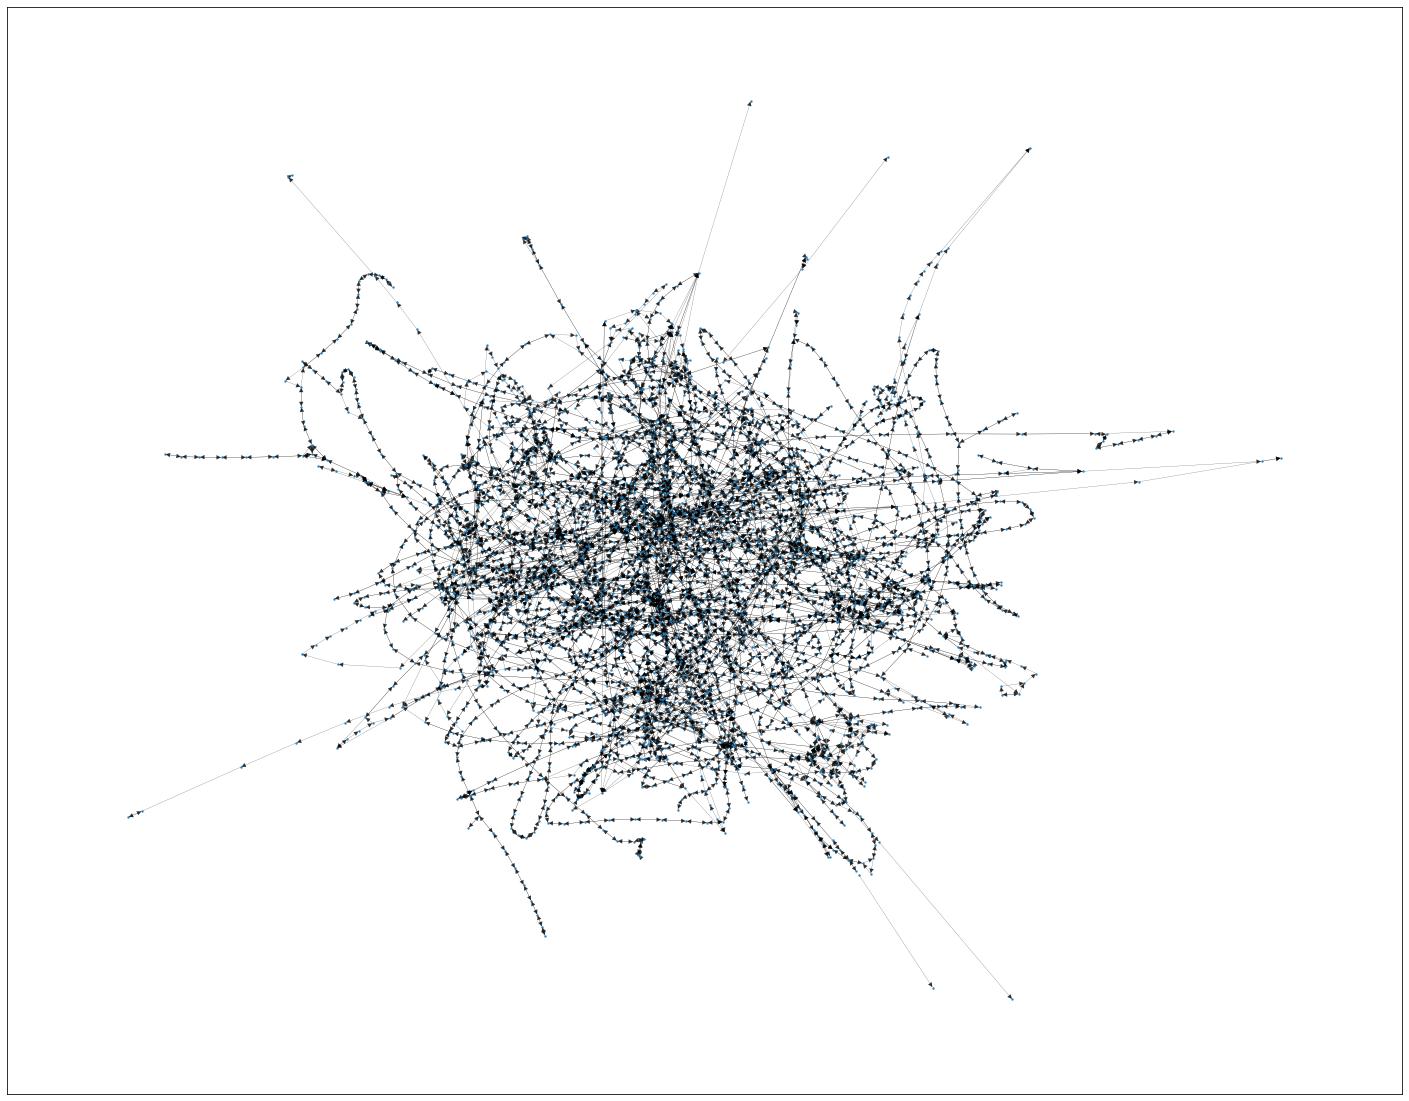

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20));
nx.draw_networkx(H, ax=ax, with_labels=False,node_size=2,alpha=0.8,width=0.2)

#### 2. Establish methods for algorithms

MINCUT-MAXFLOW: The function __minimum_cut()__ returns cut_value that is the total weight of all cutting edges, as well as 2 sets of nodes each of them is a partition that contains the "s" or the "t" from which you can easily compute the edge_cut.

In [154]:
import numpy as np
import pandas as pd

def hasPath(s,t):
    return nx.has_path(H,s,t)

def shortestPath(s,t):
    return nx.shortest_path(H,s,t,weight='a')

def mincut(s,t):
    cut_value, [reachable, non_reachable] = nx.minimum_cut(H,s,t, capacity='a')
    return [cut_value, len(reachable), len(non_reachable)]

#### 3. Execute MINCUT-MAXFLOW algorithm from central station to all nodes in the network

In [ ]:
def mincutToAllNodes(source_node_id):
    vals = []
    source_id=stops[str(source_node_id)]['stop_id']
    source_name=stops[str(source_node_id)]['stop_name']
    source_lon=stops[str(source_node_id)]['stop_lon']
    source_lat=stops[str(source_node_id)]['stop_lat']
    for node in H.nodes():
        if node != source_node_id:
            sink_id=stops[str(node)]['stop_id']
            sink_name=stops[str(node)]['stop_name']
            sink_lon=stops[str(node)]['stop_lon']
            sink_lat=stops[str(node)]['stop_lat']
            print(round(mincut(source_node_id,node)[0],4),"\t",mincut(source_node_id,node)[1],"\t",mincut(source_node_id,node)[2],"\t",source_id,source_name,sink_id,sink_name)
            vals.append((mincut(source_node_id,node)[0],mincut(source_node_id,node)[1],mincut(source_node_id,node)[2],source_id,source_name,source_lon,source_lat,sink_id,sink_name,sink_lon,sink_lat))
    output = np.array(vals, dtype=str)
    pd.DataFrame(output).to_csv("./mincut_values_from_" + source_id +".csv",index=False,header=['cut_value','reachable','non_reachable','source_id','source_name','source_lon','source_lat','sink_id','sink_name','sink_lon','sink_lat'])


#### X. Computing the average degree connectivity of the graph.

The average degree connectivity is the average nearest neighbor degree of nodes with degree k. For weighted graphs, an analogous measure is computed using the weighted average neighbors degree.

In [49]:
nx.k_nearest_neighbors(H,'in+out','in+out',weight='a')

{2: 2.4672023137530177,
 9: 3.224797061013991,
 4: 2.690590334544085,
 5: 3.307009610920636,
 7: 3.474515012799073,
 13: 4.114950728276256,
 6: 3.8492849489603422,
 8: 3.8925991453181568,
 14: 7.229046794091129,
 10: 3.627162312958644,
 37: 3.0959056499210496,
 12: 5.53815962949278,
 15: 4.256128187725079,
 3: 2.2447156583597403,
 11: 4.22422563283959,
 22: 5.015754654621449,
 1: 2.8887861144525186,
 19: 3.7301644626725565,
 28: 3.158386124247803,
 20: 3.3674846702805685,
 17: 3.040184422923833,
 18: 4.004449276219838,
 16: 3.360466264596977}

#### Y. Compute load centrality for nodes.

The load centrality of a node is the *fraction of all shortest paths* that pass through that node.

In [69]:
load_centrality = nx.load_centrality(H,weight='a')
betweenness_centrality = nx.betweenness_centrality(H,weight='a')